<a href="https://colab.research.google.com/github/andssuu/PBEA7347/blob/main/notebooks/b3_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/andssuu/PBEA7347.git



Cloning into 'PBEA7347'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 57 (delta 12), reused 47 (delta 8), pack-reused 0
Unpacking objects: 100% (57/57), done.


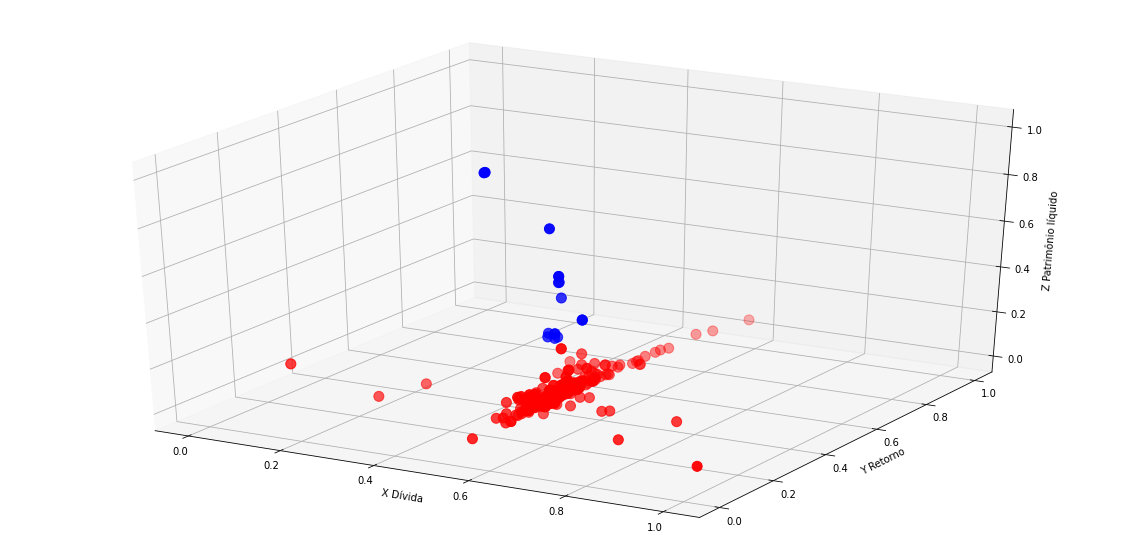

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('PBEA7347/data/b3_data_14012021.csv', float_precision='high', sep=";")
#data = df.iloc[:, 10:]
labels = df.iloc[:, 0]

divida = df.iloc[:, 12:]
retorno = df.iloc[:,11:12]
patrimonio = df.iloc[:,3:4]

retorno = retorno * 100
patrimonio = patrimonio * 1000000


data = divida
data = data.join(retorno)
data = data.join(patrimonio)


normalized_data = (data - data.min()) / (data.max() - data.min())
# normalized_data = data
kmeans = KMeans(n_clusters=2, random_state=0).fit(normalized_data)
#print(kmeans.labels_)
data_clustered = kmeans.predict(normalized_data)
#print(kmeans.cluster_centers_)

fig = plt.figure(figsize=(20, 10))
graph = fig.add_subplot(111, projection='3d')
LABEL_COLOR_MAP = {0 : 'red', 1 : 'blue', 2: 'green'}
label_color = [LABEL_COLOR_MAP[l] for l in data_clustered]
graph.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], c=label_color, marker='o', s=100)

graph.set_xlabel('X Dívida')
graph.set_ylabel('Y Retorno')
graph.set_zlabel('Z Patrimônio líquido')


plt.show()
